# **EXPERIMENT I**

In this experiment, we will apply these layers:

1. Dense with 1024 Fully Connected layers
2. Without Dropout layer
3. Without BatchNormalization after Conv2D layer

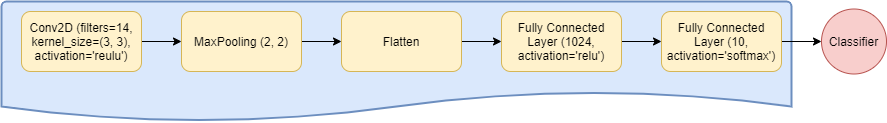

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# Initialize the He initializer
initializer = tf.keras.initializers.HeNormal()

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Resizing

In [5]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3) , activation='relu'))

model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3687424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 3,698,122
Trainable params: 3,698,122
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history_data = model.fit(x=train_images, 
                         y=train_labels,
                         epochs=300)

Epoch 1/300
1563/1563 [==============================] - 31s 2ms/step - loss: 1.6131 - accuracy: 0.4269
Epoch 2/300
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1119 - accuracy: 0.6086
Epoch 3/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9146 - accuracy: 0.6799
Epoch 4/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7395 - accuracy: 0.7429
Epoch 5/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5723 - accuracy: 0.8063
Epoch 6/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4248 - accuracy: 0.8593
Epoch 7/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.9048
Epoch 8/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2005 - accuracy: 0.9381
Epoch 9/300
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1194 - accuracy: 0.9647
Epoch 10/300
1563/1563 [==============================] - 4s 2ms/step - 

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def eval_model(model, test_images, test_labels):
  predictions = np.argmax(model.predict(test_images), axis=1)
  print(str(accuracy_score(y_pred=predictions, y_true=test_labels)))
  print(str(recall_score(y_pred=predictions, y_true=test_labels, average='macro')))

In [8]:
eval_model(model, test_images, test_labels)

0.6349
0.6349


In [9]:
model.save('/content/gdrive/MyDrive/Tradition_FE_Extraction vs CNN/Models/EXPI-Cifar10_model_CNN_Approach_v1.h5')

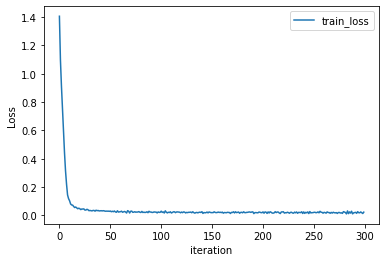

In [10]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

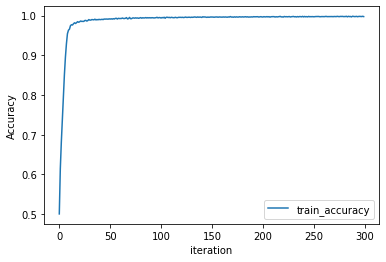

In [11]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()